# [EPOCH] build-up Week01

## Chapter 04 선형 회귀 : 보험료 예측하기

---------------

### 4.2 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd

In [3]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)

-------------

### 4.3. 데이터 확인하기

In [4]:
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [5]:
data.head( )

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [7]:
data.describe( )

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [8]:
round(data.describe( ) , 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


----------

### 4.4 전처리 : 학습셋과 시험셋 나누기

#### 4.4.2 데이터셋 나누기

In [9]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state=100) 

------------

### 4.5 모델링

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression( )

In [14]:
model.fit(X_train, y_train)

LinearRegression()

---------------------
### 4.6 모델을 활용해 예측하기

In [15]:
pred = model.predict(X_test)

--------
### 4.7 예측 모델 평가하기

#### 4.7.1 테이블로 평가하기

In [16]:
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

In [17]:
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


#### 4.7.2 그래프로 평가하기

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

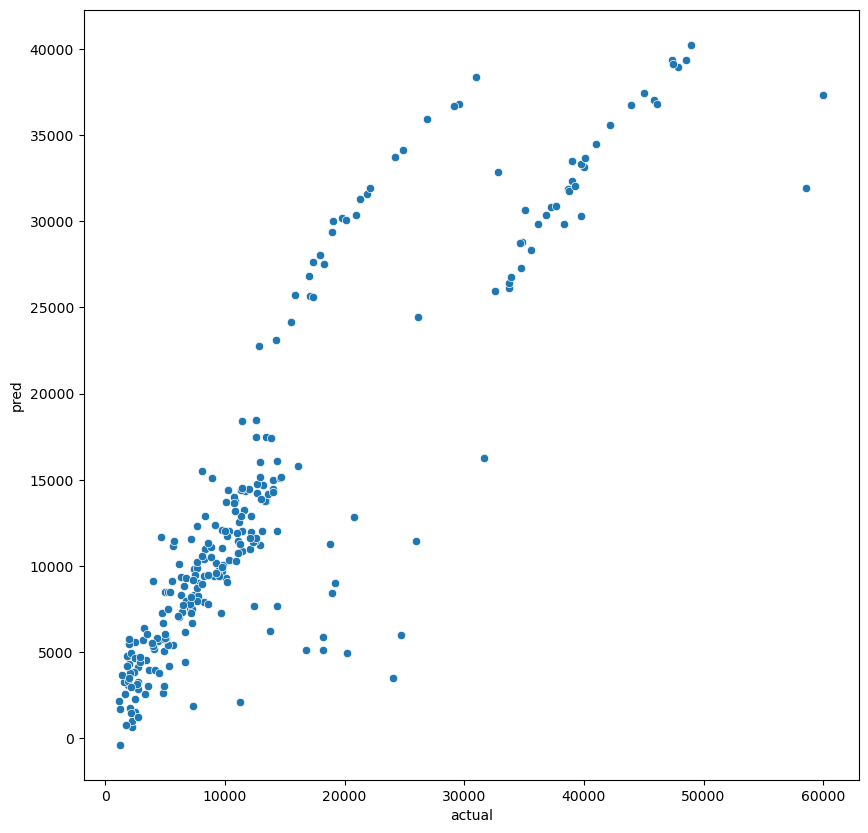

In [19]:
plt.figure(figsize=(10,10)) 
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) 

#### 4.7.3 통계적인 방법으로 평가하기 : RMSE

In [20]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, pred) ** 0.5 

5684.927776334484

In [21]:
mean_squared_error(y_test, pred, squared = False)

C:\Users\jso25\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5684.927776334484

In [22]:
model.score(X_train, y_train)

0.7368220127747351

-----------

#### 4.8 이해하기 : 선형 회귀

In [25]:
model.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [26]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [27]:
model.intercept_

-11576.99997611236

-----------

## Question

- 이번 실습에서는 RMSE로 모델을 평가했는데 실제 보험사의 관점에서는 평균 오차보다 큰 오차가 더 중요한 경우도 있을 것 같습니다. 이런 상황에서 RMSE 외에 어떤 평가 지표들을 고려할 수 있을까요?
- BMI는 수십 단위인데 보험료는 수천~수만 단위라서 두 변수 간의 스케일 차이가 크더라고요. 이런 경우 선형 회귀 계수의 해석이나 학습 과정에 어떤 영향을 줄 수 있는지 궁금합니다.
- 흡연자는 상대적으로 소수지만 보험료에는 큰 영향을 미치다 보니 데이터가 불균형해질 수 있다는 생각이 들었습니다. 이런 경우 회귀 모델이 과소나 과대 추정을 하지 않도록 하려면 어떤 접근이 있을까요?